# Ramia_Assignment7

In [0]:
import os 
import numpy as np
import tensorflow as tf

In [0]:
RANDOM_SEED = 9999

In [0]:
def reset_graph(seed=RANDOM_SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [0]:
height64 = 64
width64 = 64
height128 = 128
width128 = 128

In [0]:
channels1 = 1
channels3 = 3

In [6]:
from google.colab import files
uploaded = files.upload()

Saving cats_1000_64_64_1.npy to cats_1000_64_64_1.npy
Saving dogs_1000_64_64_1.npy to dogs_1000_64_64_1.npy


In [0]:
import io

cats_1000_64_64_1 = np.load(io.BytesIO(uploaded['cats_1000_64_64_1.npy']))
dogs_1000_64_64_1 = np.load(io.BytesIO(uploaded['dogs_1000_64_64_1.npy']))
# cats_1000_64_64_3 = np.load(io.BytesIO(uploaded['cats_1000_64_64_3.npy']))
# dogs_1000_64_64_3 = np.load(io.BytesIO(uploaded['dogs_1000_64_64_3.npy']))
# cats_1000_128_128_1 = np.load(io.BytesIO(uploaded['cats_1000_128_128_1.npy']))
# dogs_1000_128_128_1 = np.load(io.BytesIO(uploaded['dogs_1000_128_128_1.npy']))
# cats_1000_128_128_3 = np.load(io.BytesIO(uploaded['cats_1000_128_128_3.npy']))
# dogs_1000_128_128_3 = np.load(io.BytesIO(uploaded['dogs_1000_128_128_3.npy']))

In [0]:
from matplotlib import pyplot as plt  # for display of images
def show_grayscale_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

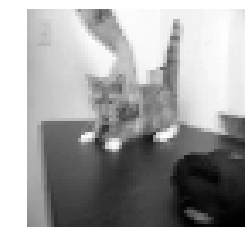

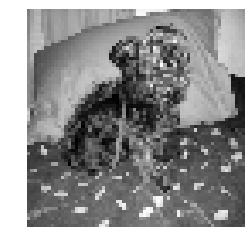

In [9]:
show_grayscale_image(cats_1000_64_64_1[0,:,:,0])
show_grayscale_image(dogs_1000_64_64_1[0,:,:,0])

In [0]:
n_inputs64 = height64 * width64
n_inputs128 = height128 * width128

In [0]:
n_outputs = 2

In [0]:
X_cat_dog_64_1 = np.concatenate((cats_1000_64_64_1, dogs_1000_64_64_1), axis = 0) 
X_cat_dog_64_1 = X_cat_dog_64_1.reshape(-1,width64*height64)

# X_cat_dog_64_3 = np.concatenate((cats_1000_64_64_3, dogs_1000_64_64_3), axis = 0) 
# X_cat_dog_64_3 = X_cat_dog_64_3.reshape(-1,width64*height64)

# X_cat_dog_128_1 = np.concatenate((cats_1000_128_128_1, dogs_1000_128_128_1), axis = 0) 
# X_cat_dog_128_1 = X_cat_dog_128_1.reshape(-1,width128*height128)

# X_cat_dog_128_3 = np.concatenate((cats_1000_128_128_3, dogs_1000_128_128_3), axis = 0) 
# X_cat_dog_128_3 = X_cat_dog_128_3.reshape(-1,width128*height128)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(np.array([0., 255.]).reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_cat_dog_64_1_min_max = scaler.transform(X_cat_dog_64_1)
# X_cat_dog_64_3_min_max = scaler.transform(X_cat_dog_64_3)
# X_cat_dog_128_1_min_max = scaler.transform(X_cat_dog_128_1)
# X_cat_dog_128_3_min_max = scaler.transform(X_cat_dog_128_3)

In [0]:
y_cat_dog = np.concatenate((np.zeros((1000), dtype = np.int32),
                            np.ones((1000), dtype = np.int32)), axis = 0)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train_64_1, X_test_64_1, y_train_64_1, y_test_64_1 = train_test_split(X_cat_dog_64_1_min_max,
                                                                        y_cat_dog,
                                                                        test_size=0.20,
                                                                        random_state = RANDOM_SEED)

# X_train_64_3, X_test_64_3, y_train_64_3, y_test_64_3 = train_test_split(X_cat_dog_64_3_min_max,
#                                                                         y_cat_dog,
#                                                                         test_size=0.20,
#                                                                         random_state = RANDOM_SEED)

# X_train_128_1, X_test_128_1, y_train_128_1, y_test_128_1 = train_test_split(X_cat_dog_128_1_min_max,
#                                                                             y_cat_dog,
#                                                                             test_size=0.20,
#                                                                             random_state = RANDOM_SEED)

# X_train_128_3, X_test_128_3, y_train_128_3, y_test_128_3 = train_test_split(X_cat_dog_128_3_min_max,
#                                                                             y_cat_dog,
#                                                                             test_size=0.20,
#                                                                             random_state = RANDOM_SEED)

In [0]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [20]:
conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs64], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height64, width64, channels1])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.


In [21]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train_64_1, y_train_64_1, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test_64_1, y: y_test_64_1})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_catdog_model")

InvalidArgumentError: ignored